#Importar librerías

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

In [ ]:
from skimage.util import random_noise, img_as_ubyte, img_as_float

In [ ]:
from skimage.transform import rotate

In [ ]:
from PIL import Image

#Carga de datos

In [ ]:
(im_dev, y_dev), (im_test, y_test) = fashion_mnist.load_data()

##Aplanamiento

In [ ]:
x_dev = im_dev.reshape((60000,28*28))
x_test = im_test.reshape((10000,28*28))

##Etiquetas de clase para más fácil visualización

In [ ]:
label_dict = {0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

In [ ]:
l_dev  = pd.Series(y_dev ).map(label_dict)
l_test = pd.Series(y_test).map(label_dict)

#Visualización

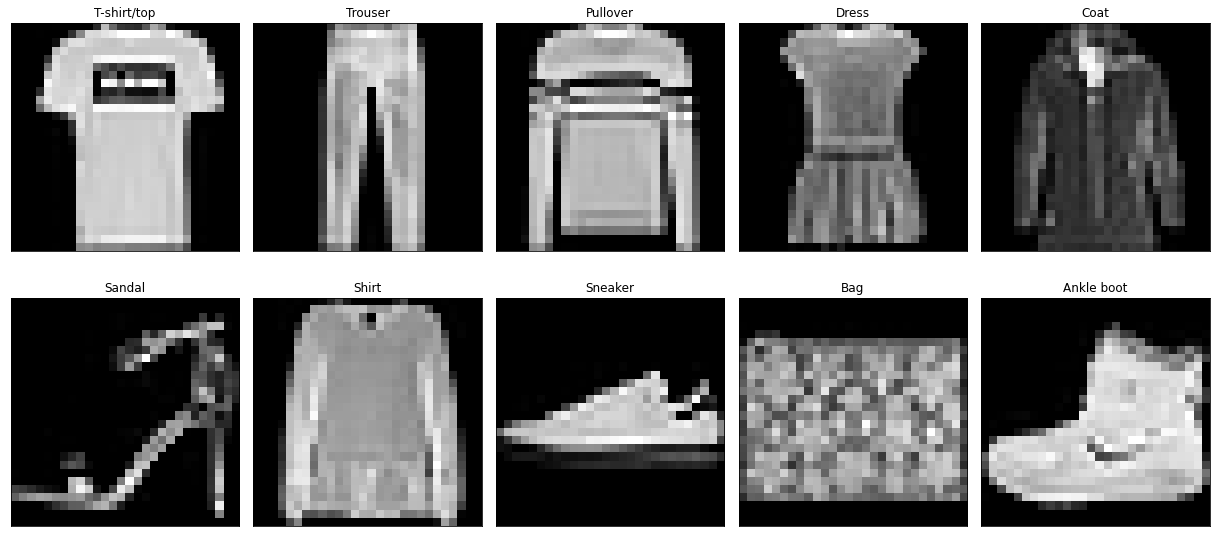

In [ ]:
plt.figure(figsize=(17,8))
for i,label in label_dict.items():
  label_idxs = np.argwhere(y_dev == i)
  plt.subplot(2,5,i+1)
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(im_dev[label_idxs[0]]),cmap='gray', vmin = 0, vmax = 255)
plt.tight_layout()

#División en entrenamiento y validación

Se estratifica de manera de que la proporción de clases se mantenga

In [ ]:
x_train, x_val, l_train, l_val = train_test_split(x_dev, l_dev, test_size=0.20, random_state=42,stratify = l_dev)

#Entrenamiento con parámetros por defecto

##Árbol de decisión

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train,l_train)

l_pred = tree.predict(x_val)
print(classification_report(l_val,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.90      1200
         Bag       0.91      0.91      0.91      1200
        Coat       0.65      0.65      0.65      1200
       Dress       0.81      0.78      0.80      1200
    Pullover       0.67      0.68      0.67      1200
      Sandal       0.90      0.90      0.90      1200
       Shirt       0.53      0.55      0.54      1200
     Sneaker       0.88      0.87      0.87      1200
 T-shirt/top       0.77      0.74      0.76      1200
     Trouser       0.94      0.95      0.95      1200

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



##Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,l_train)

l_pred = nb.predict(x_val)
print(classification_report(l_val,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.69      0.83      0.75      1200
         Bag       0.88      0.81      0.84      1200
        Coat       0.45      0.63      0.53      1200
       Dress       0.65      0.89      0.75      1200
    Pullover       0.61      0.59      0.60      1200
      Sandal       0.67      0.16      0.25      1200
       Shirt       0.34      0.16      0.22      1200
     Sneaker       0.60      0.91      0.72      1200
 T-shirt/top       0.75      0.78      0.76      1200
     Trouser       0.98      0.88      0.93      1200

    accuracy                           0.66     12000
   macro avg       0.66      0.66      0.64     12000
weighted avg       0.66      0.66      0.64     12000



##Bagging

In [ ]:
bg = BaggingClassifier()
bg.fit(x_train, l_train)

l_pred = bg.predict(x_val)
print(classification_report(l_val,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.93      0.94      0.94      1200
         Bag       0.93      0.97      0.95      1200
        Coat       0.72      0.80      0.76      1200
       Dress       0.87      0.88      0.87      1200
    Pullover       0.74      0.76      0.75      1200
      Sandal       0.94      0.94      0.94      1200
       Shirt       0.69      0.62      0.65      1200
     Sneaker       0.93      0.92      0.93      1200
 T-shirt/top       0.84      0.80      0.82      1200
     Trouser       0.98      0.96      0.97      1200

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



##Boosting

In [ ]:
ab = AdaBoostClassifier()
ab.fit(x_train, l_train)

l_pred = ab.predict(x_val)
print(classification_report(l_val,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.67      0.31      0.43      1200
         Bag       0.83      0.64      0.72      1200
        Coat       0.48      0.01      0.03      1200
       Dress       0.54      0.57      0.55      1200
    Pullover       0.23      0.96      0.37      1200
      Sandal       0.83      0.47      0.60      1200
       Shirt       0.15      0.00      0.01      1200
     Sneaker       0.47      0.96      0.63      1200
 T-shirt/top       0.18      0.03      0.05      1200
     Trouser       0.98      0.60      0.74      1200

    accuracy                           0.46     12000
   macro avg       0.54      0.46      0.41     12000
weighted avg       0.54      0.46      0.41     12000



##Boosting con Bayes

Solo una curiosidad, nada que hubiera que hacer realmente, no funciona tan bien a pesar de que Bayes es débil.

In [ ]:
ab = AdaBoostClassifier(MultinomialNB())
ab.fit(x_train, l_train)

l_pred = ab.predict(x_val)
print(classification_report(l_val,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.00      0.00      0.00      1200
         Bag       0.89      0.47      0.62      1200
        Coat       0.28      0.01      0.01      1200
       Dress       0.65      0.59      0.62      1200
    Pullover       0.39      0.62      0.48      1200
      Sandal       0.18      0.50      0.26      1200
       Shirt       0.12      0.33      0.18      1200
     Sneaker       0.21      0.09      0.12      1200
 T-shirt/top       0.67      0.42      0.52      1200
     Trouser       0.96      0.39      0.56      1200

    accuracy                           0.34     12000
   macro avg       0.43      0.34      0.34     12000
weighted avg       0.43      0.34      0.34     12000



D:\Programas\Anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\Anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\Anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random forest

##Mejor número de estimadores

In [ ]:
params_grid = {'n_estimators': list(range(1, 5, 1)) +list(range(5, 50, 5)) + list(range(50, 100, 25))}

kfoldcv = StratifiedKFold(n_splits=5)
base_forest = RandomForestClassifier( n_jobs= -1)
scorer_fn = make_scorer(f1_score, average = 'weighted')
gridcv = GridSearchCV(estimator=base_forest,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv, verbose = 3, return_train_score = True)
gridcv.fit(x_dev,y_dev);

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END n_estimators=1;, score=(train=0.910, test=0.760) total time=   0.8s
[CV 2/5] END n_estimators=1;, score=(train=0.913, test=0.753) total time=   0.9s
[CV 3/5] END n_estimators=1;, score=(train=0.913, test=0.759) total time=   0.8s
[CV 4/5] END n_estimators=1;, score=(train=0.915, test=0.771) total time=   0.9s
[CV 5/5] END n_estimators=1;, score=(train=0.916, test=0.767) total time=   0.9s
[CV 1/5] END n_estimators=2;, score=(train=0.913, test=0.759) total time=   1.0s
[CV 2/5] END n_estimators=2;, score=(train=0.913, test=0.758) total time=   0.9s
[CV 3/5] END n_estimators=2;, score=(train=0.911, test=0.754) total time=   1.0s
[CV 4/5] END n_estimators=2;, score=(train=0.913, test=0.767) total time=   1.0s
[CV 5/5] END n_estimators=2;, score=(train=0.912, test=0.761) total time=   1.1s
[CV 1/5] END n_estimators=3;, score=(train=0.964, test=0.808) total time=   1.0s
[CV 2/5] END n_estimators=3;, score=(train=0.967

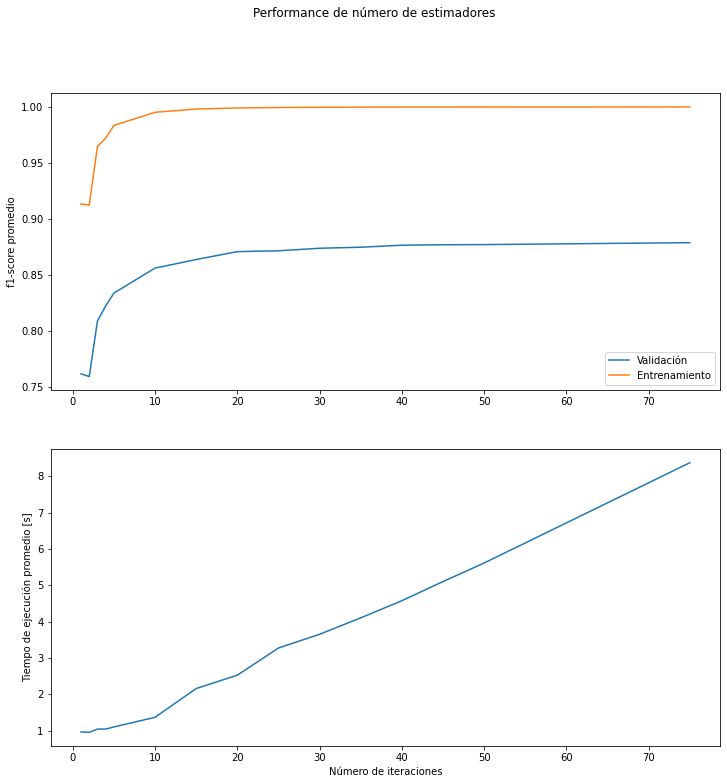

In [ ]:
results = pd.DataFrame(gridcv.cv_results_)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(12,12)
fig.suptitle('Performance de número de estimadores')


ax1.plot(results.param_n_estimators,results.mean_test_score,results.param_n_estimators,results.mean_train_score)
ax1.legend(['Validación', 'Entrenamiento'])
ax1.set_ylabel('f1-score promedio')


ax2.plot(results.param_n_estimators,results.mean_fit_time)
ax2.set_xlabel('Número de iteraciones')
ax2.set_ylabel('Tiempo de ejecución promedio [s]')

plt.show()

Este parámetro es el mejor, pero si uno ve el gráfico, no es necesario hacer tantas iteraciones para llegar a un resultado similar.

In [ ]:
gridcv.best_params_

{'n_estimators': 250}

##Mejor profundidad

In [ ]:
params_grid = {'n_estimators': [75],
               'max_depth': range(4,25,1)}

kfoldcv = StratifiedKFold(n_splits=5)
base_forest = RandomForestClassifier( n_jobs= -1)
scorer_fn = make_scorer(f1_score, average = 'weighted')
gridcv = GridSearchCV(estimator=base_forest,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv, verbose = 3, return_train_score = True)
gridcv.fit(x_dev,y_dev);

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END max_depth=4, n_estimators=75;, score=(train=0.716, test=0.717) total time=   4.3s
[CV 2/5] END max_depth=4, n_estimators=75;, score=(train=0.720, test=0.715) total time=   2.9s
[CV 3/5] END max_depth=4, n_estimators=75;, score=(train=0.718, test=0.718) total time=   2.8s
[CV 4/5] END max_depth=4, n_estimators=75;, score=(train=0.718, test=0.722) total time=   3.0s
[CV 5/5] END max_depth=4, n_estimators=75;, score=(train=0.720, test=0.718) total time=   3.1s
[CV 1/5] END max_depth=5, n_estimators=75;, score=(train=0.758, test=0.756) total time=   3.6s
[CV 2/5] END max_depth=5, n_estimators=75;, score=(train=0.760, test=0.753) total time=   3.4s
[CV 3/5] END max_depth=5, n_estimators=75;, score=(train=0.751, test=0.746) total time=   3.2s
[CV 4/5] END max_depth=5, n_estimators=75;, score=(train=0.742, test=0.742) total time=   3.6s
[CV 5/5] END max_depth=5, n_estimators=75;, score=(train=0.757, test=0.752) total t

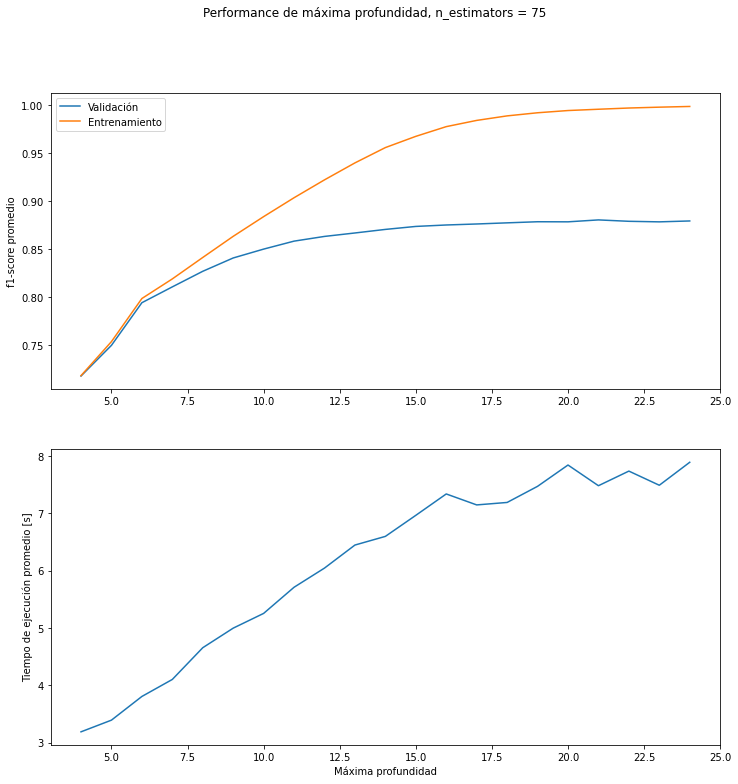

In [ ]:
results = pd.DataFrame(gridcv.cv_results_)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(12,12)
fig.suptitle('Performance de máxima profundidad, n_estimators = 75')


ax1.plot(results.param_max_depth,results.mean_test_score,results.param_max_depth,results.mean_train_score)
ax1.legend(['Validación', 'Entrenamiento'])
ax1.set_ylabel('f1-score promedio')


ax2.plot(results.param_max_depth,results.mean_fit_time)
ax2.set_xlabel('Máxima profundidad')
ax2.set_ylabel('Tiempo de ejecución promedio [s]')

plt.show()

#Gradient boosting

##Mejor número de estimadores

In [ ]:
params_grid = {'n_estimators':range(150, 300, 50)}

kfoldcv = StratifiedKFold(n_splits=5)
base_forest = GradientBoostingClassifier()
scorer_fn = make_scorer(f1_score, average = 'weighted')
gridcv = GridSearchCV(estimator=base_forest,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv, verbose = 3, return_train_score = True)
gridcv.fit(x_dev,y_dev);

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END n_estimators=150;, score=(train=0.925, test=0.882) total time=84.8min
[CV 2/5] END n_estimators=150;, score=(train=0.926, test=0.878) total time=84.4min
[CV 3/5] END n_estimators=150;, score=(train=0.926, test=0.881) total time=84.5min
[CV 4/5] END n_estimators=150;, score=(train=0.925, test=0.883) total time=85.5min
[CV 5/5] END n_estimators=150;, score=(train=0.926, test=0.879) total time=86.6min
[CV 1/5] END n_estimators=200;, score=(train=0.939, test=0.885) total time=112.4min
[CV 2/5] END n_estimators=200;, score=(train=0.940, test=0.883) total time=111.7min
[CV 3/5] END n_estimators=200;, score=(train=0.940, test=0.886) total time=111.8min
[CV 4/5] END n_estimators=200;, score=(train=0.939, test=0.889) total time=111.7min
[CV 5/5] END n_estimators=200;, score=(train=0.940, test=0.884) total time=111.7min
[CV 1/5] END n_estimators=250;, score=(train=0.950, test=0.890) total time=139.7min
[CV 2/5] END n_estima

In [ ]:
gridcv.best_params_

{'n_estimators': 250}

In [ ]:
params_grid = {'n_estimators':range(5, 30, 5)
              ,'max_depth': [1]}

kfoldcv = StratifiedKFold(n_splits=5)
base_forest = GradientBoostingClassifier()
scorer_fn = make_scorer(f1_score, average = 'weighted')
gridcv = GridSearchCV(estimator=base_forest,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv, verbose = 3, return_train_score = True)
gridcv.fit(x_dev,y_dev);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END max_depth=1, n_estimators=5;, score=(train=0.616, test=0.613) total time=  59.9s
[CV 2/5] END max_depth=1, n_estimators=5;, score=(train=0.616, test=0.617) total time=  59.4s
[CV 3/5] END max_depth=1, n_estimators=5;, score=(train=0.617, test=0.612) total time=  59.8s
[CV 4/5] END max_depth=1, n_estimators=5;, score=(train=0.621, test=0.622) total time= 1.0min
[CV 5/5] END max_depth=1, n_estimators=5;, score=(train=0.622, test=0.621) total time=  59.4s
[CV 1/5] END max_depth=1, n_estimators=10;, score=(train=0.687, test=0.681) total time= 2.0min
[CV 2/5] END max_depth=1, n_estimators=10;, score=(train=0.685, test=0.681) total time= 2.0min
[CV 3/5] END max_depth=1, n_estimators=10;, score=(train=0.689, test=0.685) total time= 2.0min
[CV 4/5] END max_depth=1, n_estimators=10;, score=(train=0.684, test=0.685) total time= 2.0min
[CV 5/5] END max_depth=1, n_estimators=10;, score=(train=0.685, test=0.686) total time= 2.

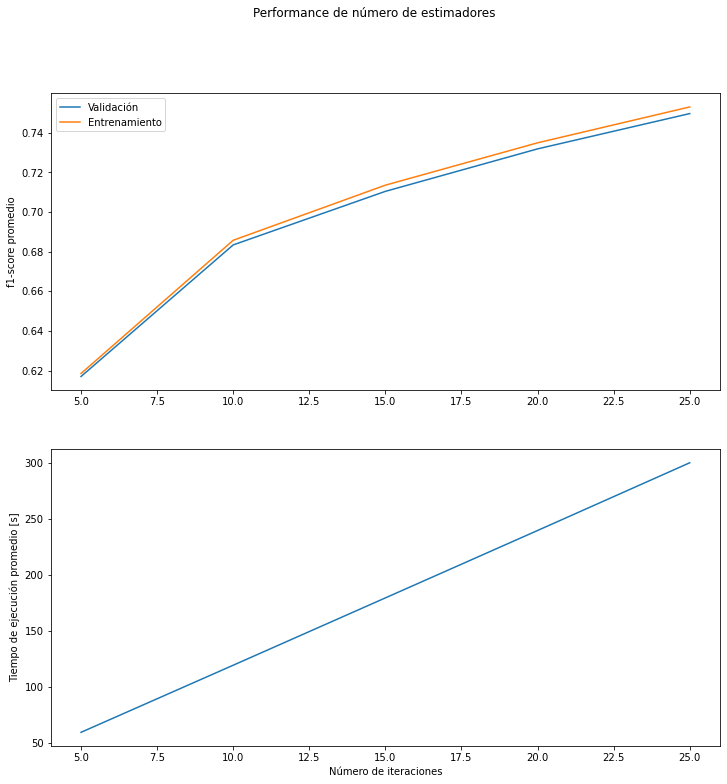

In [ ]:
results = pd.DataFrame(gridcv.cv_results_)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(12,12)
fig.suptitle('Performance de número de estimadores')

ax1.plot(results.param_n_estimators,results.mean_test_score,results.param_n_estimators,results.mean_train_score)
ax1.legend(['Validación', 'Entrenamiento'])
ax1.set_ylabel('f1-score promedio')

ax2.plot(results.param_n_estimators,results.mean_fit_time)
ax2.set_xlabel('Número de iteraciones')
ax2.set_ylabel('Tiempo de ejecución promedio [s]');


## Mejor profundidad

In [ ]:
params_grid = {'n_estimators': [20]
              ,'max_depth': [1,5,10,20,30,40]}

kfoldcv = StratifiedKFold(n_splits=5)
base_forest = GradientBoostingClassifier()
scorer_fn = make_scorer(f1_score, average = 'weighted')
gridcv = GridSearchCV(estimator=base_forest,param_grid = params_grid,scoring=scorer_fn,cv=kfoldcv, verbose = 3, return_train_score = True)
gridcv.fit(x_dev,y_dev);

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END max_depth=1, n_estimators=20;, score=(train=0.735, test=0.733) total time= 4.0min
[CV 2/5] END max_depth=1, n_estimators=20;, score=(train=0.736, test=0.729) total time= 3.9min
[CV 3/5] END max_depth=1, n_estimators=20;, score=(train=0.735, test=0.735) total time= 4.2min
[CV 4/5] END max_depth=1, n_estimators=20;, score=(train=0.735, test=0.732) total time= 4.4min
[CV 5/5] END max_depth=1, n_estimators=20;, score=(train=0.733, test=0.730) total time= 4.4min
[CV 1/5] END max_depth=5, n_estimators=20;, score=(train=0.889, test=0.858) total time=21.2min
[CV 2/5] END max_depth=5, n_estimators=20;, score=(train=0.890, test=0.852) total time=21.5min
[CV 3/5] END max_depth=5, n_estimators=20;, score=(train=0.891, test=0.859) total time=21.2min
[CV 4/5] END max_depth=5, n_estimators=20;, score=(train=0.889, test=0.859) total time=19.2min
[CV 5/5] END max_depth=5, n_estimators=20;, score=(train=0.890, test=0.853) total tim

In [ ]:
results = pd.read_csv('C:/Users/Null/Desktop/resultados3.csv',index_col=0) 

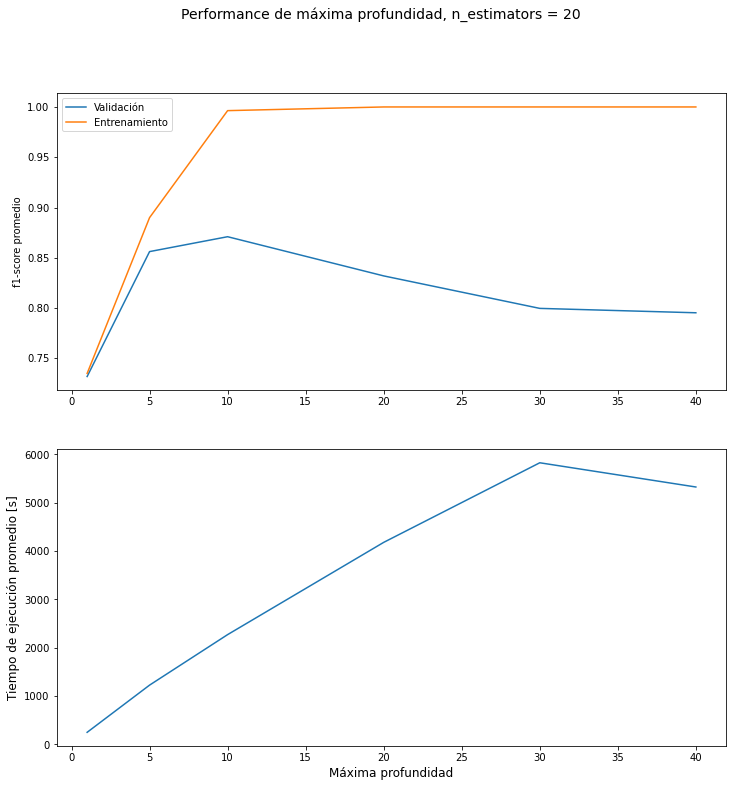

In [ ]:
#results = pd.DataFrame(gridcv.cv_results_)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(12,12)
fig.suptitle('Performance de máxima profundidad, n_estimators = 20', fontsize= 14)

ax1.plot(results.param_max_depth,results.mean_test_score,results.param_max_depth,results.mean_train_score)
ax1.legend(['Validación', 'Entrenamiento'])
ax1.set_ylabel('f1-score promedio')

ax2.plot(results.param_max_depth,results.mean_fit_time)
ax2.set_xlabel('Máxima profundidad', fontsize= 12)
ax2.set_ylabel('Tiempo de ejecución promedio [s]', fontsize= 12)

plt.show()

#Creación de datos editados para probar robustez

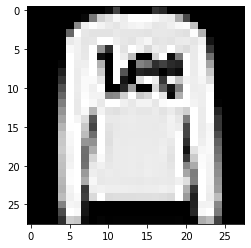

In [ ]:
plt.imshow(im_test[1], cmap='gray', vmin = 0, vmax = 255);

In [ ]:
im_test_gaussian = 255*random_noise(im_test, mode='gaussian')

In [ ]:
x_test_gaussian = im_test_gaussian.reshape((10000,28*28))

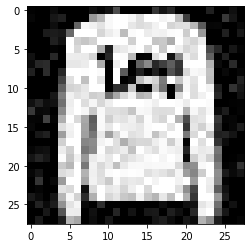

In [ ]:
plt.imshow(im_test_gaussian[1], cmap='gray', vmin = 0, vmax = 255);

In [ ]:
im_test_pepper = 255*random_noise(im_test, mode='pepper')

In [ ]:
x_test_pepper = im_test_pepper.reshape((10000,28*28))

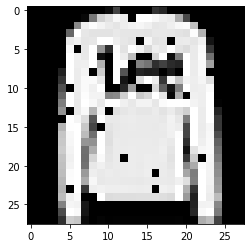

In [ ]:
plt.imshow(im_test_pepper[1], cmap='gray', vmin = 0, vmax = 255);

In [ ]:
im_test_rotated = im_test.copy()
for i in range(10000):
  im_test_rotated[i] = rotate(im_test[i], 10, preserve_range = True)

In [ ]:
x_test_rotated = im_test_rotated.reshape((10000,28*28))

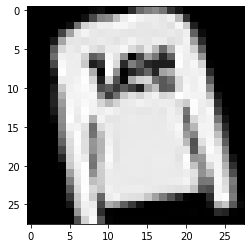

In [ ]:
plt.imshow(im_test_rotated[1], cmap='gray', vmin = 0, vmax = 255);

In [ ]:
im_test_contrast = 255*(0.3*img_as_float(im_test))

In [ ]:
x_test_contrast = im_test_contrast.reshape((10000,28*28))

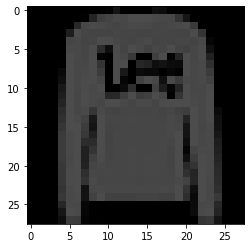

In [ ]:
plt.imshow(im_test_contrast[1], cmap='gray', vmin = 0, vmax = 255);

In [ ]:
im_test_bright = np.clip(255*(img_as_float(im_test)-0.25),0,255)

In [ ]:
x_test_bright = im_test_bright.reshape((10000,28*28))

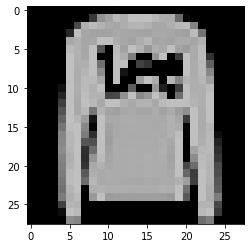

In [ ]:
plt.imshow(im_test_bright[1], cmap='gray', vmin = 0, vmax = 255);

#Carga de imágenes bajadas de internet

In [ ]:
!gdown https://drive.google.com/drive/folders/19nGy89E-qbUAshXmQCyX4R9XIm1nZHLi --folder

In [ ]:
import os
path_of_the_directory= './Ropa/'
sorted_list = os.listdir(path_of_the_directory)
sorted_list.sort()
Black_list = sorted_list[0:10]
im_test_Black = []
rsz_list = sorted_list[10:]
im_test_rsz = []
for filename in Black_list:
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        #im = plt.imread(f)
        im = Image.open(f)
        im = im.convert('L') 
        im_test_Black.append(np.array(im))
for filename in rsz_list:
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        #im = plt.imread(f)
        im = Image.open(f)
        im = im.convert('L')
        im_test_rsz.append(np.array(im))

x_test_Black = np.array(im_test_Black).reshape(10,28*28)
l_test_Black = pd.Series(['T-shirt/top'] * 10)
x_test_rsz = np.array(im_test_Black).reshape(10,28*28)
l_test_rsz = pd.Series(['T-shirt/top'] * 10)


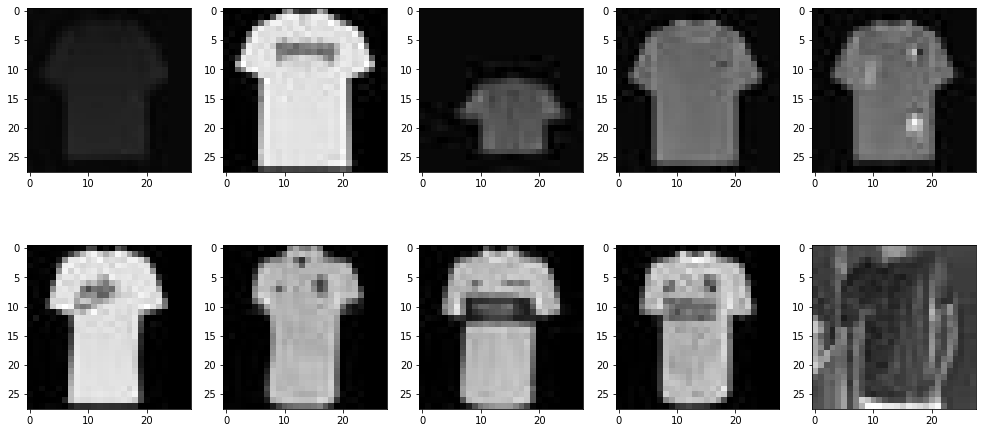

In [ ]:
plt.figure(figsize=(17,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(im_test_Black[i], cmap = 'gray', vmin = 0, vmax = 255)

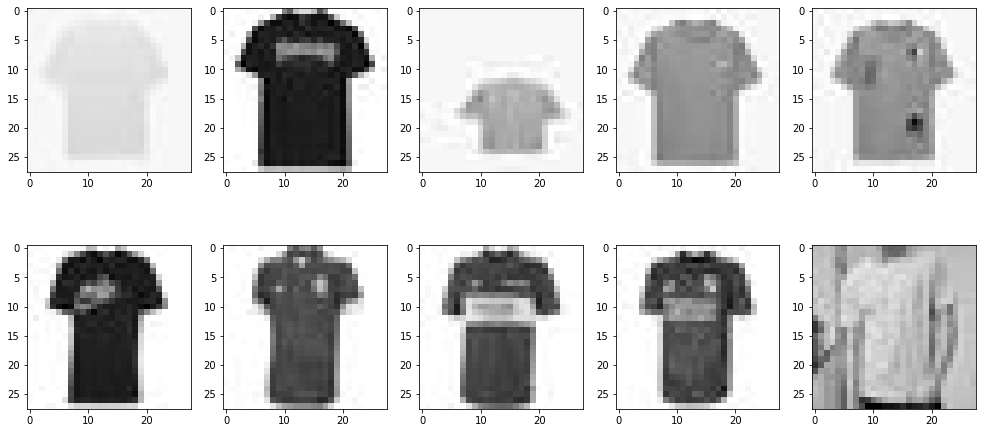

In [ ]:
plt.figure(figsize=(17,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(im_test_rsz[i], cmap = 'gray', vmin = 0, vmax = 255)

#Random Forest con la mejor configuración de hiperparámetros

In [ ]:
forest = RandomForestClassifier(n_jobs= -1,
                                n_estimators= 75,
                                max_depth= 30)
forest.fit(x_dev,l_dev)

l_pred = forest.predict(x_test)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.95      0.95      0.95      1000
         Bag       0.96      0.97      0.97      1000
        Coat       0.76      0.81      0.78      1000
       Dress       0.88      0.91      0.89      1000
    Pullover       0.77      0.80      0.78      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.59      0.65      1000
     Sneaker       0.93      0.95      0.94      1000
 T-shirt/top       0.82      0.85      0.84      1000
     Trouser       0.99      0.96      0.98      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



##Matriz de confusión


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
l_pred = forest.predict(x_test)

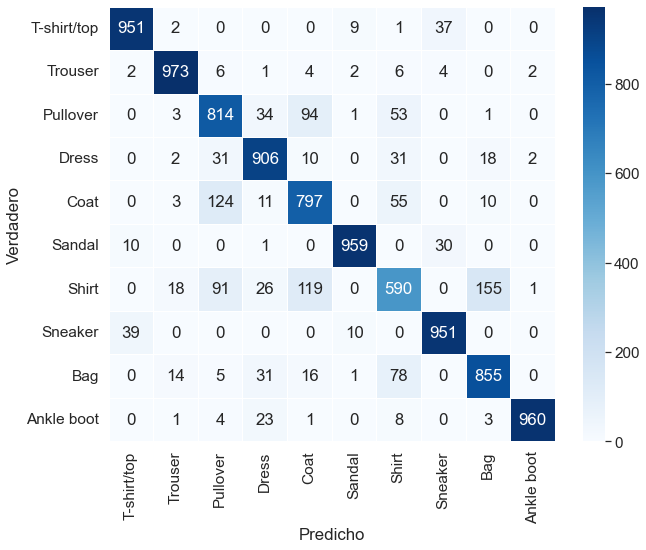

In [ ]:

plt.figure(figsize=(10,8) )

cm = pd.DataFrame(confusion_matrix(l_test,l_pred), columns = list(label_dict.values()), index = list(label_dict.values()))
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g',linewidths=1)
plt.xlabel('Predicho')
plt.ylabel('Verdadero');

##Robustez de Random Forest

In [ ]:
l_pred = forest.predict(x_test_gaussian)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.92      0.91      0.91      1000
         Bag       0.70      0.97      0.81      1000
        Coat       0.76      0.59      0.67      1000
       Dress       0.74      0.78      0.76      1000
    Pullover       0.70      0.54      0.61      1000
      Sandal       0.89      0.89      0.89      1000
       Shirt       0.40      0.68      0.50      1000
     Sneaker       0.95      0.62      0.75      1000
 T-shirt/top       0.70      0.69      0.70      1000
     Trouser       1.00      0.65      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.77      0.73      0.74     10000
weighted avg       0.77      0.73      0.74     10000



In [ ]:
l_pred = forest.predict(x_test_pepper)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.96      0.94      0.95      1000
         Bag       0.96      0.97      0.96      1000
        Coat       0.77      0.81      0.79      1000
       Dress       0.85      0.92      0.88      1000
    Pullover       0.76      0.78      0.77      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.70      0.59      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       0.99      0.95      0.97      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
l_pred = forest.predict(x_test_rotated)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.87      0.97      0.92      1000
         Bag       0.93      0.96      0.94      1000
        Coat       0.61      0.74      0.67      1000
       Dress       0.57      0.80      0.67      1000
    Pullover       0.68      0.59      0.63      1000
      Sandal       0.96      0.90      0.93      1000
       Shirt       0.47      0.53      0.50      1000
     Sneaker       0.90      0.85      0.88      1000
 T-shirt/top       0.81      0.68      0.74      1000
     Trouser       1.00      0.49      0.66      1000

    accuracy                           0.75     10000
   macro avg       0.78      0.75      0.75     10000
weighted avg       0.78      0.75      0.75     10000



In [ ]:
l_pred = forest.predict(x_test_contrast)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.99      0.35      0.51      1000
         Bag       0.97      0.90      0.93      1000
        Coat       0.78      0.41      0.54      1000
       Dress       0.82      0.84      0.83      1000
    Pullover       0.63      0.79      0.70      1000
      Sandal       0.71      0.97      0.82      1000
       Shirt       0.49      0.61      0.54      1000
     Sneaker       0.68      0.92      0.78      1000
 T-shirt/top       0.77      0.81      0.79      1000
     Trouser       1.00      0.90      0.95      1000

    accuracy                           0.75     10000
   macro avg       0.78      0.75      0.74     10000
weighted avg       0.78      0.75      0.74     10000



In [ ]:
l_pred = forest.predict(x_test_bright)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.97      0.83      0.90      1000
         Bag       0.91      0.89      0.90      1000
        Coat       0.79      0.64      0.71      1000
       Dress       0.79      0.86      0.83      1000
    Pullover       0.73      0.66      0.70      1000
      Sandal       0.54      0.98      0.70      1000
       Shirt       0.57      0.49      0.53      1000
     Sneaker       0.89      0.78      0.83      1000
 T-shirt/top       0.80      0.69      0.75      1000
     Trouser       0.99      0.94      0.96      1000

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



In [ ]:
l_pred = forest.predict(x_test_Black)
print(classification_report(l_test_Black,l_pred,zero_division=0))

              precision    recall  f1-score   support

         Bag       0.00      0.00      0.00         0
       Shirt       0.00      0.00      0.00         0
 T-shirt/top       1.00      0.50      0.67        10

    accuracy                           0.50        10
   macro avg       0.33      0.17      0.22        10
weighted avg       1.00      0.50      0.67        10



In [ ]:
l_pred = forest.predict(x_test_rsz)
print(classification_report(l_test_rsz,l_pred,zero_division=0))

              precision    recall  f1-score   support

         Bag       0.00      0.00      0.00         0
       Shirt       0.00      0.00      0.00         0
 T-shirt/top       1.00      0.50      0.67        10

    accuracy                           0.50        10
   macro avg       0.33      0.17      0.22        10
weighted avg       1.00      0.50      0.67        10



#Gradient boosting con la mejor configuración de hiperparámetros

In [ ]:
GradientBoosting = GradientBoostingClassifier(
                                n_estimators= 20,
                                max_depth= 10)
GradientBoosting.fit(x_dev,l_dev)

l_pred = GradientBoosting.predict(x_test)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.95      0.95      0.95      1000
         Bag       0.96      0.96      0.96      1000
        Coat       0.76      0.79      0.78      1000
       Dress       0.87      0.89      0.88      1000
    Pullover       0.77      0.77      0.77      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.66      0.61      0.63      1000
     Sneaker       0.93      0.95      0.94      1000
 T-shirt/top       0.81      0.83      0.82      1000
     Trouser       0.99      0.96      0.97      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



##Robustez de Gradient Boosting

In [ ]:
l_pred = GradientBoosting.predict(x_test_gaussian)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.85      0.65      0.74      1000
         Bag       0.32      0.79      0.46      1000
        Coat       0.66      0.44      0.53      1000
       Dress       0.60      0.53      0.56      1000
    Pullover       0.41      0.47      0.43      1000
      Sandal       0.85      0.32      0.47      1000
       Shirt       0.31      0.48      0.37      1000
     Sneaker       0.83      0.42      0.56      1000
 T-shirt/top       0.47      0.53      0.50      1000
     Trouser       0.90      0.45      0.60      1000

    accuracy                           0.51     10000
   macro avg       0.62      0.51      0.52     10000
weighted avg       0.62      0.51      0.52     10000



In [ ]:
l_pred = GradientBoosting.predict(x_test_pepper)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.95      0.90      0.93      1000
         Bag       0.94      0.94      0.94      1000
        Coat       0.77      0.76      0.76      1000
       Dress       0.83      0.89      0.86      1000
    Pullover       0.75      0.76      0.76      1000
      Sandal       0.89      0.96      0.92      1000
       Shirt       0.63      0.60      0.61      1000
     Sneaker       0.92      0.91      0.92      1000
 T-shirt/top       0.81      0.80      0.80      1000
     Trouser       0.97      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
l_pred = GradientBoosting.predict(x_test_rotated)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.81      0.97      0.88      1000
         Bag       0.90      0.88      0.89      1000
        Coat       0.54      0.68      0.60      1000
       Dress       0.49      0.71      0.58      1000
    Pullover       0.61      0.41      0.49      1000
      Sandal       0.93      0.86      0.90      1000
       Shirt       0.36      0.45      0.40      1000
     Sneaker       0.89      0.78      0.83      1000
 T-shirt/top       0.70      0.75      0.72      1000
     Trouser       1.00      0.32      0.48      1000

    accuracy                           0.68     10000
   macro avg       0.72      0.68      0.68     10000
weighted avg       0.72      0.68      0.68     10000



In [ ]:
l_pred = GradientBoosting.predict(x_test_contrast)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.99      0.50      0.66      1000
         Bag       0.97      0.80      0.87      1000
        Coat       0.73      0.25      0.37      1000
       Dress       0.81      0.82      0.81      1000
    Pullover       0.60      0.79      0.68      1000
      Sandal       0.71      0.97      0.82      1000
       Shirt       0.43      0.64      0.51      1000
     Sneaker       0.72      0.89      0.80      1000
 T-shirt/top       0.75      0.79      0.77      1000
     Trouser       0.99      0.87      0.93      1000

    accuracy                           0.73     10000
   macro avg       0.77      0.73      0.72     10000
weighted avg       0.77      0.73      0.72     10000



In [ ]:
l_pred = GradientBoosting.predict(x_test_bright)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.95      0.84      0.89      1000
         Bag       0.91      0.87      0.89      1000
        Coat       0.75      0.58      0.66      1000
       Dress       0.77      0.84      0.80      1000
    Pullover       0.70      0.70      0.70      1000
      Sandal       0.64      0.97      0.78      1000
       Shirt       0.51      0.56      0.53      1000
     Sneaker       0.90      0.77      0.83      1000
 T-shirt/top       0.80      0.69      0.74      1000
     Trouser       0.95      0.92      0.93      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [ ]:
l_pred = GradientBoosting.predict(x_test_Black)
print(classification_report(l_test_Black,l_pred,zero_division=0))

              precision    recall  f1-score   support

         Bag       0.00      0.00      0.00         0
       Shirt       0.00      0.00      0.00         0
 T-shirt/top       1.00      0.50      0.67        10

    accuracy                           0.50        10
   macro avg       0.33      0.17      0.22        10
weighted avg       1.00      0.50      0.67        10



In [ ]:
l_pred = GradientBoosting.predict(x_test_rsz)
print(classification_report(l_test_rsz,l_pred,zero_division=0))

              precision    recall  f1-score   support

         Bag       0.00      0.00      0.00         0
       Shirt       0.00      0.00      0.00         0
 T-shirt/top       1.00      0.50      0.67        10

    accuracy                           0.50        10
   macro avg       0.33      0.17      0.22        10
weighted avg       1.00      0.50      0.67        10



#XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob")
xgb_model.fit(x_dev,y_dev)
y_pred = xgb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.82      0.84      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
l_dev  = pd.Series(y_dev).map(label_dict)

In [ ]:
y_pred = xgb_model.predict(x_test_gaussian)
l_pred  = pd.Series(y_pred).map(label_dict)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.87      0.95      0.91      1000
         Bag       0.67      0.97      0.79      1000
        Coat       0.73      0.74      0.73      1000
       Dress       0.83      0.84      0.83      1000
    Pullover       0.84      0.38      0.52      1000
      Sandal       0.98      0.77      0.86      1000
       Shirt       0.47      0.70      0.57      1000
     Sneaker       0.94      0.73      0.82      1000
 T-shirt/top       0.75      0.76      0.76      1000
     Trouser       1.00      0.91      0.95      1000

    accuracy                           0.78     10000
   macro avg       0.81      0.78      0.78     10000
weighted avg       0.81      0.78      0.78     10000



In [ ]:
y_pred = xgb_model.predict(x_test_pepper)
l_pred  = pd.Series(y_pred).map(label_dict)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.97      0.94      0.96      1000
         Bag       0.97      0.98      0.98      1000
        Coat       0.81      0.82      0.81      1000
       Dress       0.88      0.92      0.90      1000
    Pullover       0.81      0.81      0.81      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.71      0.67      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
y_pred = xgb_model.predict(x_test_rotated)
l_pred  = pd.Series(y_pred).map(label_dict)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.89      0.97      0.93      1000
         Bag       0.94      0.95      0.95      1000
        Coat       0.66      0.66      0.66      1000
       Dress       0.52      0.85      0.64      1000
    Pullover       0.71      0.39      0.50      1000
      Sandal       0.98      0.91      0.94      1000
       Shirt       0.38      0.64      0.48      1000
     Sneaker       0.92      0.90      0.91      1000
 T-shirt/top       0.84      0.67      0.75      1000
     Trouser       1.00      0.33      0.50      1000

    accuracy                           0.73     10000
   macro avg       0.78      0.73      0.73     10000
weighted avg       0.78      0.73      0.73     10000



In [ ]:
y_pred = xgb_model.predict(x_test_contrast)
l_pred  = pd.Series(y_pred).map(label_dict)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.99      0.78      0.87      1000
         Bag       0.99      0.89      0.94      1000
        Coat       0.85      0.27      0.41      1000
       Dress       0.82      0.86      0.84      1000
    Pullover       0.60      0.82      0.69      1000
      Sandal       0.92      0.95      0.93      1000
       Shirt       0.49      0.67      0.56      1000
     Sneaker       0.80      0.99      0.88      1000
 T-shirt/top       0.77      0.82      0.80      1000
     Trouser       1.00      0.88      0.94      1000

    accuracy                           0.79     10000
   macro avg       0.82      0.79      0.79     10000
weighted avg       0.82      0.79      0.79     10000



In [ ]:
y_pred = xgb_model.predict(x_test_bright)
l_pred  = pd.Series(y_pred).map(label_dict)
print(classification_report(l_test,l_pred))

              precision    recall  f1-score   support

  Ankle boot       0.95      0.84      0.89      1000
         Bag       0.91      0.87      0.89      1000
        Coat       0.75      0.58      0.66      1000
       Dress       0.77      0.84      0.80      1000
    Pullover       0.70      0.70      0.70      1000
      Sandal       0.64      0.97      0.78      1000
       Shirt       0.51      0.56      0.53      1000
     Sneaker       0.90      0.77      0.83      1000
 T-shirt/top       0.80      0.69      0.74      1000
     Trouser       0.95      0.92      0.93      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [ ]:
y_pred = xgb_model.predict(x_test_Black)
l_pred  = pd.Series(y_pred).map(label_dict)
print(classification_report(l_test_Black,l_pred,zero_division=0))

              precision    recall  f1-score   support

         Bag       0.00      0.00      0.00         0
       Shirt       0.00      0.00      0.00         0
 T-shirt/top       1.00      0.80      0.89        10

    accuracy                           0.80        10
   macro avg       0.33      0.27      0.30        10
weighted avg       1.00      0.80      0.89        10



In [ ]:
y_pred = xgb_model.predict(x_test_rsz)
l_pred  = pd.Series(y_pred).map(label_dict)
print(classification_report(l_test_rsz,l_pred,zero_division=0))

              precision    recall  f1-score   support

         Bag       0.00      0.00      0.00         0
       Shirt       0.00      0.00      0.00         0
 T-shirt/top       1.00      0.80      0.89        10

    accuracy                           0.80        10
   macro avg       0.33      0.27      0.30        10
weighted avg       1.00      0.80      0.89        10

